# Building Damage Estimatior

---

## Description
In this script, we will train a Convolutional Neural Network and substitute it with the final layer of VGG 16 to classify a given image as:
* Not Damaged/Irrelevant
* Moderately Damaged
* Highly Damaged

We will also compare different architectures to find the best hyper paramters for the model.

---

## Architectures & Results

Following are different Architectures we trained and find out that the ___Architectures 6___ worked best.

#### Model-1	(Deep Architecture)


Params:

batch_size = 2
epochs = 100
train_samples = 420
validation_samples = 80


Architecture:
```
model_top = Sequential()
model_top.add(Flatten(input_shape=train_data.shape[1:]))
model_top.add(Dense(256, activation='relu'))
model_top.add(Dropout(0.4))
model_top.add(Dense(128, activation='relu'))
model_top.add(Dropout(0.2))
model_top.add(Dense(64, activation='relu'))
model_top.add(Dropout(0.2))
model_top.add(Dense(32, activation='relu'))
model_top.add(Dropout(0.2))
model_top.add(Dense(16, activation='relu'))
model_top.add(Dropout(0.2))
model_top.add(Dense(8, activation='relu'))
model_top.add(Dropout(0.1))
model_top.add(Dense(4, activation='relu'))
model_top.add(Dense(2, activation='relu'))
model_top.add(Dense(1, activation='sigmoid'))
model_top.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
```

Validation Results (Loss, Acc):

[3.000179100036621, 0.8125]




#### Model-2 (Changed Optimizer for model 1)


Params:

batch_size = 2
epochs = 100
train_samples = 420
validation_samples = 80

Architecture:
```
model_top = Sequential()
model_top.add(Flatten(input_shape=train_data.shape[1:]))
model_top.add(Dense(256, activation='relu'))
model_top.add(Dropout(0.4))
model_top.add(Dense(128, activation='relu'))
model_top.add(Dropout(0.2))
model_top.add(Dense(64, activation='relu'))
model_top.add(Dropout(0.2))
model_top.add(Dense(32, activation='relu'))
model_top.add(Dropout(0.2))
model_top.add(Dense(16, activation='relu'))
model_top.add(Dropout(0.2))
model_top.add(Dense(8, activation='relu'))
model_top.add(Dropout(0.1))
model_top.add(Dense(4, activation='relu'))
model_top.add(Dense(2, activation='relu'))
model_top.add(Dense(1, activation='sigmoid'))
model_top.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
```

Validation Results (Loss, Acc):

[1.2831820487976073, 0.7875]




#### Model-3 (Wide Architecture)



Params:

batch_size = 5
epochs = 100
train_samples = 420
validation_samples = 80


Architecture:
```
model_top = Sequential()
model_top.add(Flatten(input_shape=train_data.shape[1:]))
model_top.add(Dense(256, activation='relu'))
model_top.add(Dropout(0.2))
model_top.add(Dense(256, activation='relu'))
model_top.add(Dropout(0.2))
model_top.add(Dense(256, activation='relu'))
model_top.add(Dropout(0.2))
model_top.add(Dense(1, activation='sigmoid'))
model_top.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
```

Validation Results (Loss, Acc):

[1.007776403427124, 0.825]






#### Model-4 (Changed optimizer for model 3)


Params:

batch_size = 5
epochs = 100
train_samples = 420
validation_samples = 80


Architecture:
```
model_top = Sequential()
model_top.add(Flatten(input_shape=train_data.shape[1:]))
model_top.add(Dense(256, activation='relu'))
model_top.add(Dropout(0.2))
model_top.add(Dense(256, activation='relu'))
model_top.add(Dropout(0.2))
model_top.add(Dense(256, activation='relu'))
model_top.add(Dropout(0.2))
model_top.add(Dense(1, activation='sigmoid'))
model_top.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
```

Validation Results (Loss, Acc):

[2.3870808601379396, 0.8375]




#### Model-6 (changed epochs for model 3) [Accuracy with 10 folds 83.75% (+/- 2.17%)]


Params:

batch_size = 5
epochs = 100
train_samples = 420
validation_samples = 80


Architecture:
```
model_top = Sequential()
model_top.add(Flatten(input_shape=train_data.shape[1:]))
model_top.add(Dense(256, activation='relu'))
model_top.add(Dropout(0.2))
model_top.add(Dense(256, activation='relu'))
model_top.add(Dropout(0.2))
model_top.add(Dense(256, activation='relu'))
model_top.add(Dropout(0.2))
model_top.add(Dense(1, activation='sigmoid'))
model_top.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
```

Validation Results (Loss, Acc):

[1.9399483680725098, 0.8375]




In [1]:
# Importing Dependencies

import os
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers
from keras import applications
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import StratifiedKFold
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

import sys
sys.path.append('../')
from Utilities.model_visualization import model_to_png

print('Imports Done')

C:\Users\Javapocalypse\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Imports Done


In [2]:
# paths to training and validation data

train_data_dir = 'dataset/train'
validation_data_dir = 'dataset/test'

In [3]:
# Params for CNN

img_width, img_height = 150, 150
batch_size = 5
epochs = 200
train_samples = 420
validation_samples = 80

In [4]:
# Loading vgg except the final layer

model_vgg = applications.VGG16(include_top=False, weights='imagenet')

In [5]:
# Loading Training and Validation Images

datagen = ImageDataGenerator(rescale=1. / 255)

train_generator_bottleneck = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)

validation_generator_bottleneck = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)


Found 420 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


In [6]:
# Saving bottleneck features to reduce computations 

bottleneck_features_train = model_vgg.predict_generator(train_generator_bottleneck, train_samples // batch_size)
np.save(open('bottleneck_features_train.npy', 'wb+'), bottleneck_features_train)

bottleneck_features_validation = model_vgg.predict_generator(validation_generator_bottleneck, validation_samples // batch_size)
np.save(open('bottleneck_features_validation.npy', 'wb'), bottleneck_features_validation)

In [7]:
# Converting into np arrays

train_data = np.load(open('bottleneck_features_train.npy', 'rb'))
train_labels = np.array([0] * (train_samples // 2) + [1] * (train_samples // 2))

validation_data = np.load(open('bottleneck_features_validation.npy', 'rb'))
validation_labels = np.array([0] * (validation_samples // 2) + [1] * (validation_samples // 2))

In [8]:
# Convolutional Network Architecture

model_top = Sequential()
model_top.add(Flatten(input_shape=train_data.shape[1:]))
model_top.add(Dense(256, activation='relu'))
model_top.add(Dropout(0.2))
model_top.add(Dense(256, activation='relu'))
model_top.add(Dropout(0.2))
model_top.add(Dense(256, activation='relu'))
model_top.add(Dropout(0.2))
model_top.add(Dense(1, activation='sigmoid'))
model_top.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_top.summary()

model_to_png(model_top, 'Bottleneck_features')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
__________

In [26]:
# Creating checkpoints

filepath="model-3-weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=True, mode='auto', period=1)
callbacks_list = [checkpoint]

In [10]:
# K-Fold for model evaluation

seed = 7
np.random.seed(seed)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []
for train, test in kfold.split(validation_data, validation_labels):
    model_top = Sequential()
    model_top.add(Flatten(input_shape=train_data.shape[1:]))
    model_top.add(Dense(256, activation='relu'))
    model_top.add(Dropout(0.2))
    model_top.add(Dense(256, activation='relu'))
    model_top.add(Dropout(0.2))
    model_top.add(Dense(256, activation='relu'))
    model_top.add(Dropout(0.2))
    model_top.add(Dense(1, activation='sigmoid'))
    model_top.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model_top.fit(train_data, train_labels,
        epochs=epochs, 
        batch_size=batch_size )
    scores = model_top.evaluate(validation_data, validation_labels)
    cvscores.append(scores[1] * 100)
print("Acc: %.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

Epoch 1/200
420/420 [==============================] - 1s 3ms/step - loss: 0.6423 - acc: 0.6833
Epoch 2/200
420/420 [==============================] - 1s 1ms/step - loss: 0.4080 - acc: 0.8357
Epoch 3/200
420/420 [==============================] - 1s 1ms/step - loss: 0.2060 - acc: 0.9167
Epoch 4/200
420/420 [==============================] - 1s 1ms/step - loss: 0.1618 - acc: 0.9429
Epoch 5/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0612 - acc: 0.9810
Epoch 6/200
420/420 [==============================] - 1s 1ms/step - loss: 0.1973 - acc: 0.9262
Epoch 7/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0675 - acc: 0.9738
Epoch 8/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0657 - acc: 0.9738
Epoch 9/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0556 - acc: 0.9833
Epoch 10/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0428 - acc: 0.9857
Epoch 11/200
420/420 [=================

420/420 [==============================] - 1s 1ms/step - loss: 0.0214 - acc: 0.9976
Epoch 168/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0143 - acc: 0.9929
Epoch 169/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0025 - acc: 1.0000
Epoch 170/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0033 - acc: 0.9976
Epoch 171/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0055 - acc: 0.9952
Epoch 172/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0015 - acc: 1.0000
Epoch 173/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0031 - acc: 0.9976
Epoch 174/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0062 - acc: 0.9929
Epoch 175/200
420/420 [==============================] - 1s 1ms/step - loss: 5.6636e-05 - acc: 1.0000
Epoch 176/200
420/420 [==============================] - 1s 1ms/step - loss: 2.0949e-04 - acc: 1.0000
Epoch 177/200
420/420 [===

420/420 [==============================] - 1s 1ms/step - loss: 0.0281 - acc: 0.9857
Epoch 134/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0365 - acc: 0.9905
Epoch 135/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0495 - acc: 0.9857
Epoch 136/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0222 - acc: 0.9952
Epoch 137/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0046 - acc: 1.0000
Epoch 138/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0110 - acc: 0.9929
Epoch 139/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0111 - acc: 0.9952
Epoch 140/200
420/420 [==============================] - 1s 1ms/step - loss: 2.9281e-04 - acc: 1.0000
Epoch 141/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0144 - acc: 0.9976
Epoch 142/200
420/420 [==============================] - 1s 1ms/step - loss: 1.7231e-05 - acc: 1.0000
Epoch 143/200
420/420 [===

420/420 [==============================] - 1s 1ms/step - loss: 0.0227 - acc: 0.9929
Epoch 98/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0260 - acc: 0.9905
Epoch 99/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0014 - acc: 1.0000
Epoch 100/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0141 - acc: 0.9952
Epoch 101/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0111 - acc: 0.9952
Epoch 102/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0044 - acc: 1.0000
Epoch 103/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0110 - acc: 0.9952
Epoch 104/200
420/420 [==============================] - 1s 1ms/step - loss: 3.2425e-04 - acc: 1.0000
Epoch 105/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0109 - acc: 0.9952
Epoch 106/200
420/420 [==============================] - 1s 1ms/step - loss: 3.4999e-04 - acc: 1.0000
Epoch 107/200
420/420 [=====

420/420 [==============================] - 1s 1ms/step - loss: 0.0062 - acc: 0.9952
Epoch 62/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0025 - acc: 1.0000
Epoch 63/200
420/420 [==============================] - 1s 1ms/step - loss: 8.1378e-04 - acc: 1.0000
Epoch 64/200
420/420 [==============================] - 1s 1ms/step - loss: 3.0629e-04 - acc: 1.0000
Epoch 65/200
420/420 [==============================] - 1s 1ms/step - loss: 3.1873e-04 - acc: 1.0000
Epoch 66/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0131 - acc: 0.9976
Epoch 67/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0033 - acc: 1.0000
Epoch 68/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0051 - acc: 0.9952
Epoch 69/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0032 - acc: 1.0000
Epoch 70/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0092 - acc: 0.9976
Epoch 71/200
420/420 [=========

420/420 [==============================] - 1s 1ms/step - loss: 0.0211 - acc: 0.9905
Epoch 27/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0137 - acc: 0.9929
Epoch 28/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0124 - acc: 0.9952
Epoch 29/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0014 - acc: 1.0000
Epoch 30/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0039 - acc: 1.0000
Epoch 31/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0017 - acc: 1.0000
Epoch 32/200
420/420 [==============================] - 1s 1ms/step - loss: 2.8554e-04 - acc: 1.0000
Epoch 33/200
420/420 [==============================] - 1s 1ms/step - loss: 1.9789e-04 - acc: 1.0000
Epoch 34/200
420/420 [==============================] - 1s 1ms/step - loss: 8.7668e-05 - acc: 1.0000
Epoch 35/200
420/420 [==============================] - 1s 1ms/step - loss: 2.9059e-04 - acc: 1.0000
Epoch 36/200
420/420 [=====

420/420 [==============================] - 1s 1ms/step - loss: 0.0014 - acc: 1.0000
Epoch 192/200
420/420 [==============================] - 1s 1ms/step - loss: 9.5613e-05 - acc: 1.0000
Epoch 193/200
420/420 [==============================] - 1s 1ms/step - loss: 4.5803e-05 - acc: 1.0000
Epoch 194/200
420/420 [==============================] - 1s 1ms/step - loss: 1.2749e-04 - acc: 1.0000
Epoch 195/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0019 - acc: 0.9976
Epoch 196/200
420/420 [==============================] - 1s 1ms/step - loss: 1.5041e-04 - acc: 1.0000
Epoch 197/200
420/420 [==============================] - 1s 1ms/step - loss: 4.7735e-04 - acc: 1.0000
Epoch 198/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0037 - acc: 0.9976
Epoch 199/200
420/420 [==============================] - 1s 1ms/step - loss: 1.5092e-04 - acc: 1.0000
Epoch 200/200
80/80 [==============================] - 0s 3ms/step
Epoch 1/200
420/420 [====================

420/420 [==============================] - 1s 1ms/step - loss: 0.0036 - acc: 0.9976
Epoch 157/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0075 - acc: 0.9976
Epoch 158/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0022 - acc: 1.0000
Epoch 159/200
420/420 [==============================] - 1s 1ms/step - loss: 5.3570e-04 - acc: 1.0000
Epoch 160/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0028 - acc: 1.0000
Epoch 161/200
420/420 [==============================] - 1s 1ms/step - loss: 2.3435e-04 - acc: 1.0000
Epoch 162/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0147 - acc: 0.9929
Epoch 163/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0159 - acc: 0.9881
Epoch 164/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0039 - acc: 0.9976
Epoch 165/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0034 - acc: 1.0000
Epoch 166/200
420/420 [===

420/420 [==============================] - 1s 1ms/step - loss: 2.5721e-04 - acc: 1.0000
Epoch 123/200
420/420 [==============================] - 1s 1ms/step - loss: 2.1780e-04 - acc: 1.0000
Epoch 124/200
420/420 [==============================] - 1s 1ms/step - loss: 1.8304e-04 - acc: 1.0000
Epoch 125/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0029 - acc: 0.9976
Epoch 126/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0247 - acc: 0.9976
Epoch 127/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0012 - acc: 1.0000
Epoch 128/200
420/420 [==============================] - 1s 1ms/step - loss: 3.0621e-04 - acc: 1.0000
Epoch 129/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0035 - acc: 0.9976
Epoch 130/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0018 - acc: 1.0000
Epoch 131/200
420/420 [==============================] - 1s 1ms/step - loss: 7.9171e-04 - acc: 1.0000
Epoch 132/200


420/420 [==============================] - 1s 1ms/step - loss: 0.1717 - acc: 0.9262
Epoch 5/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0735 - acc: 0.9690
Epoch 6/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0603 - acc: 0.9762
Epoch 7/200
420/420 [==============================] - 1s 1ms/step - loss: 0.1323 - acc: 0.9452
Epoch 8/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0578 - acc: 0.9810
Epoch 9/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0478 - acc: 0.9833
Epoch 10/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0609 - acc: 0.9762
Epoch 11/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0227 - acc: 0.9952
Epoch 12/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0882 - acc: 0.9738
Epoch 13/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0463 - acc: 0.9833
Epoch 14/200
420/420 [==========================

420/420 [==============================] - 1s 1ms/step - loss: 0.0091 - acc: 0.9952
Epoch 170/200
420/420 [==============================] - 1s 1ms/step - loss: 6.5401e-04 - acc: 1.0000
Epoch 171/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0273 - acc: 0.9929
Epoch 172/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0068 - acc: 0.9976
Epoch 173/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0400 - acc: 0.9881
Epoch 174/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0051 - acc: 0.9976
Epoch 175/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0565 - acc: 0.9881
Epoch 176/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0017 - acc: 1.0000
Epoch 177/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0011 - acc: 1.0000
Epoch 178/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0025 - acc: 0.9976
Epoch 179/200
420/420 [=======

Epoch 135/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0316 - acc: 0.9952
Epoch 136/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0011 - acc: 1.0000
Epoch 137/200
420/420 [==============================] - 1s 1ms/step - loss: 2.6479e-04 - acc: 1.0000
Epoch 138/200
420/420 [==============================] - 1s 1ms/step - loss: 1.1998e-04 - acc: 1.0000
Epoch 139/200
420/420 [==============================] - 1s 1ms/step - loss: 6.3775e-04 - acc: 1.0000
Epoch 140/200
420/420 [==============================] - 1s 1ms/step - loss: 1.0126e-04 - acc: 1.0000
Epoch 141/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0012 - acc: 1.0000
Epoch 142/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0171 - acc: 0.9976
Epoch 143/200
420/420 [==============================] - 1s 1ms/step - loss: 1.5511e-04 - acc: 1.0000
Epoch 144/200
420/420 [==============================] - 1s 1ms/step - loss: 1.0098e-04 - acc: 1.0

420/420 [==============================] - 1s 1ms/step - loss: 7.2027e-04 - acc: 1.0000
Epoch 101/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0030 - acc: 0.9976
Epoch 102/200
420/420 [==============================] - 1s 1ms/step - loss: 5.0465e-04 - acc: 1.0000
Epoch 103/200
420/420 [==============================] - 1s 1ms/step - loss: 7.0456e-04 - acc: 1.0000
Epoch 104/200
420/420 [==============================] - 1s 1ms/step - loss: 1.6702e-04 - acc: 1.0000
Epoch 105/200
420/420 [==============================] - 1s 1ms/step - loss: 3.3592e-06 - acc: 1.0000
Epoch 106/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0076 - acc: 0.9952
Epoch 107/200
420/420 [==============================] - 1s 1ms/step - loss: 0.2368 - acc: 0.9595
Epoch 108/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0216 - acc: 0.9905
Epoch 109/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0042 - acc: 1.0000
Epoch 110/200


In [27]:
# Model Training 

model_top.fit(train_data, train_labels,
        epochs=epochs, 
        batch_size=batch_size,
        validation_data=(validation_data, validation_labels))


Train on 420 samples, validate on 80 samples
Epoch 1/200
420/420 [==============================] - 1s 2ms/step - loss: 0.7097 - acc: 0.6333 - val_loss: 0.5979 - val_acc: 0.6250
Epoch 2/200
420/420 [==============================] - 1s 1ms/step - loss: 0.3881 - acc: 0.8310 - val_loss: 0.5731 - val_acc: 0.7750
Epoch 3/200
420/420 [==============================] - 1s 1ms/step - loss: 0.2373 - acc: 0.8952 - val_loss: 0.4001 - val_acc: 0.8500
Epoch 4/200
420/420 [==============================] - 1s 1ms/step - loss: 0.1684 - acc: 0.9286 - val_loss: 0.4482 - val_acc: 0.8375
Epoch 5/200
420/420 [==============================] - 1s 1ms/step - loss: 0.1201 - acc: 0.9476 - val_loss: 0.4713 - val_acc: 0.8500
Epoch 6/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0704 - acc: 0.9714 - val_loss: 0.5742 - val_acc: 0.8375
Epoch 7/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0585 - acc: 0.9833 - val_loss: 0.6638 - val_acc: 0.8000
Epoch 8/200
420/420 [===

420/420 [==============================] - 1s 1ms/step - loss: 0.0015 - acc: 1.0000 - val_loss: 1.4555 - val_acc: 0.8625
Epoch 122/200
420/420 [==============================] - 1s 1ms/step - loss: 8.2480e-04 - acc: 1.0000 - val_loss: 1.6814 - val_acc: 0.8500
Epoch 123/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0224 - acc: 0.9929 - val_loss: 1.1328 - val_acc: 0.8000
Epoch 124/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0915 - acc: 0.9881 - val_loss: 1.8823 - val_acc: 0.8250
Epoch 125/200
420/420 [==============================] - 1s 1ms/step - loss: 0.1170 - acc: 0.9738 - val_loss: 1.7581 - val_acc: 0.8375
Epoch 126/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0314 - acc: 0.9881 - val_loss: 1.4542 - val_acc: 0.7875
Epoch 127/200
420/420 [==============================] - 1s 1ms/step - loss: 0.0229 - acc: 0.9905 - val_loss: 0.8347 - val_acc: 0.8250
Epoch 128/200
420/420 [==============================] - 1s 1ms/s

In [28]:
# Saving Weights for later use

model_top.save_weights('model-6.h5')

In [29]:
# Validating Model

evaluate = model_top.evaluate(validation_data, validation_labels)
print(evaluate)

80/80 [==============================] - 0s 112us/step


In [9]:
# Loading Model

model_top.load_weights('model-6.h5')

In [10]:
def predict_damage(image_path):
    
    num_classes = 2
    image = load_img(image_path, target_size=(150, 150))
    image = img_to_array(image)

    # otherwise the predictions will be '0'
    image = image / 255

    image = np.expand_dims(image, axis=0)

    # build the vgg network
    model = applications.VGG16(include_top=False, weights='imagenet')

    # get the bottleneck prediction from the pre-trained vgg model
    bottleneck_prediction = model.predict(image)

    # build top model
    model_top = Sequential()
    model_top.add(Flatten(input_shape=train_data.shape[1:]))
    model_top.add(Dense(256, activation='relu'))
    model_top.add(Dropout(0.2))
    model_top.add(Dense(256, activation='relu'))
    model_top.add(Dropout(0.2))
    model_top.add(Dense(256, activation='relu'))
    model_top.add(Dropout(0.2))
    model_top.add(Dense(1, activation='sigmoid'))

    model_top.load_weights('model-6.h5')

    # use the bottleneck prediction on the top model to get the final classification
    class_predicted = model_top.predict_classes(bottleneck_prediction)

    probabilities = model_top.predict_proba(bottleneck_prediction)

    
    %pylab inline
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg
    img=mpimg.imread(image_path)
    imgplot = plt.imshow(img)
    plt.show()
    
    
    if probabilities[0][0] >= 1:
        print("\t\tImage is Irrelevant")
    elif probabilities[0][0] >= 0.8:
        print("\t\tVery low or no Damaged")
#     elif probabilities[0][0] >= 0.5:
#         print("\t\tLow Damaged")
    elif probabilities[0][0] >= 0.3:
        print("\t\tModerately Damaged")
    else:
        print("\t\tHighly Damaged")
        
    print("\n=================================================\n\n\n")

Populating the interactive namespace from numpy and matplotlib


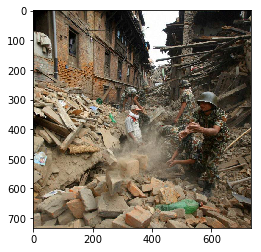

		Highly Damaged




Populating the interactive namespace from numpy and matplotlib


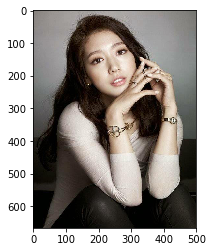

		Image is Irrelevant




Populating the interactive namespace from numpy and matplotlib


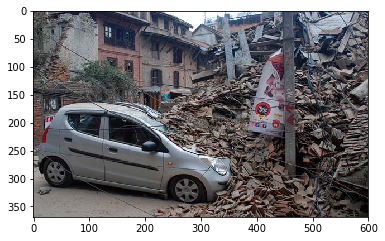

		Highly Damaged




Populating the interactive namespace from numpy and matplotlib


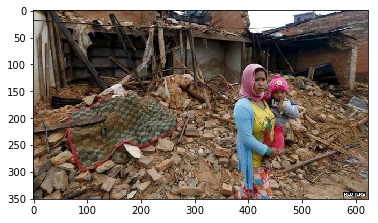

		Highly Damaged




Populating the interactive namespace from numpy and matplotlib


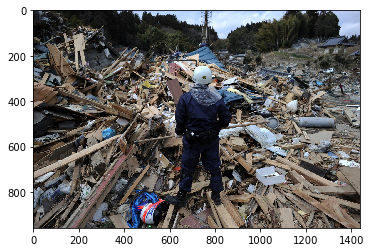

		Highly Damaged




Populating the interactive namespace from numpy and matplotlib


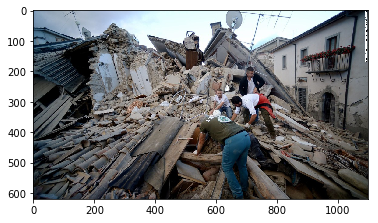

		Highly Damaged




Populating the interactive namespace from numpy and matplotlib


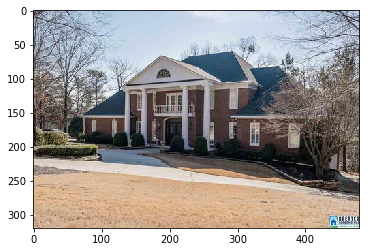

		Image is Irrelevant




Populating the interactive namespace from numpy and matplotlib


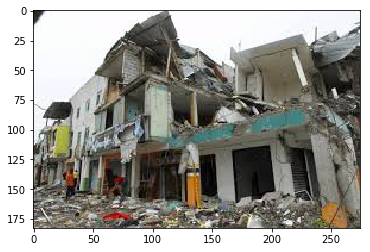

		Highly Damaged




Populating the interactive namespace from numpy and matplotlib


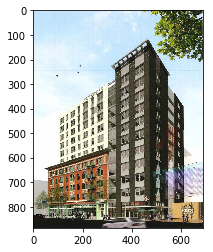

		Very low or no Damaged




Populating the interactive namespace from numpy and matplotlib


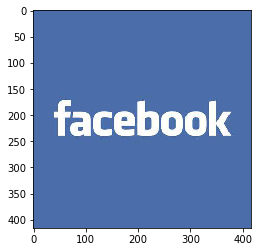

		Image is Irrelevant




Populating the interactive namespace from numpy and matplotlib


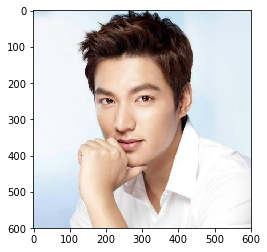

		Image is Irrelevant




Populating the interactive namespace from numpy and matplotlib


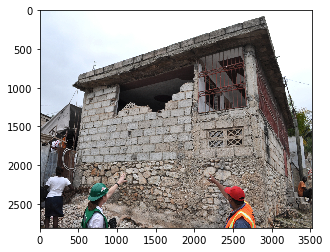

		Highly Damaged






In [11]:
for i in range(1,13):
    predict_damage('dataset/predict/'+str(i)+'.jpg')